In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, t

In [3]:
# Настройка отображения
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [4]:
control = pd.read_csv("data/control_group.csv", sep=';')
test = pd.read_csv("data/test_group.csv", sep=';')

In [5]:
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [12]:
control.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [14]:
test.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [16]:
control[control.isnull().any(axis=1)]

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
control.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [20]:
сol_nan = ['# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase']
control[сol_nan] = control[сol_nan].apply(lambda x: x.fillna(x.median()))

In [161]:
control.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [24]:
# Renaming the columns for ease of use
control = control.rename(
    columns=lambda x: x.replace("# of ", "") if x.startswith("# of ") else x
)
control = control.rename(columns={"Campaign Name": "Campaign"})

test = test.rename(
    columns=lambda x: x.replace("# of ", "") if x.startswith("# of ") else x
)
test = test.rename(columns={"Campaign Name": "Campaign"})


In [26]:
# Объединение данных
df = pd.concat([control, test], ignore_index=True)

# Просмотр структуры
df.head()

,Campaign,Date,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,113430.0,91579.0,5224.0,2390.0,1984.0,1339.0,501.0


In [28]:
df.dtypes

Campaign           object
Date               object
Spend [USD]         int64
Impressions       float64
Reach             float64
Website Clicks    float64
Searches          float64
View Content      float64
Add to Cart       float64
Purchase          float64
dtype: object

In [30]:
df["Date"] = pd.to_datetime(df["Date"], format="%d.%m.%Y")

In [34]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,60,2019-08-15 12:00:00,2019-08-01 00:00:00,2019-08-08 00:00:00,2019-08-15 12:00:00,2019-08-23 00:00:00,2019-08-30 00:00:00,NaN
Spend [USD],60.0,2425.75,1757.0,2073.75,2420.5,2727.5,3112.0,381.130461
Impressions,60.0,92136.783333,22521.0,69558.25,98281.0,117160.5,145248.0,32309.932592
Reach,60.0,71213.816667,10598.0,43235.5,77422.0,95314.25,127852.0,30875.60078
Website Clicks,60.0,5674.95,2277.0,4230.75,5581.0,7201.25,8264.0,1740.85003
Searches,60.0,2322.95,1001.0,1970.75,2390.0,2755.75,4891.0,663.404916
View Content,60.0,1901.566667,848.0,1249.0,1979.5,2422.5,4219.0,681.500622
Add to Cart,60.0,1091.416667,278.0,863.25,1082.5,1384.25,1913.0,427.780567
Purchase,60.0,521.65,222.0,340.0,501.0,685.0,890.0,195.31633


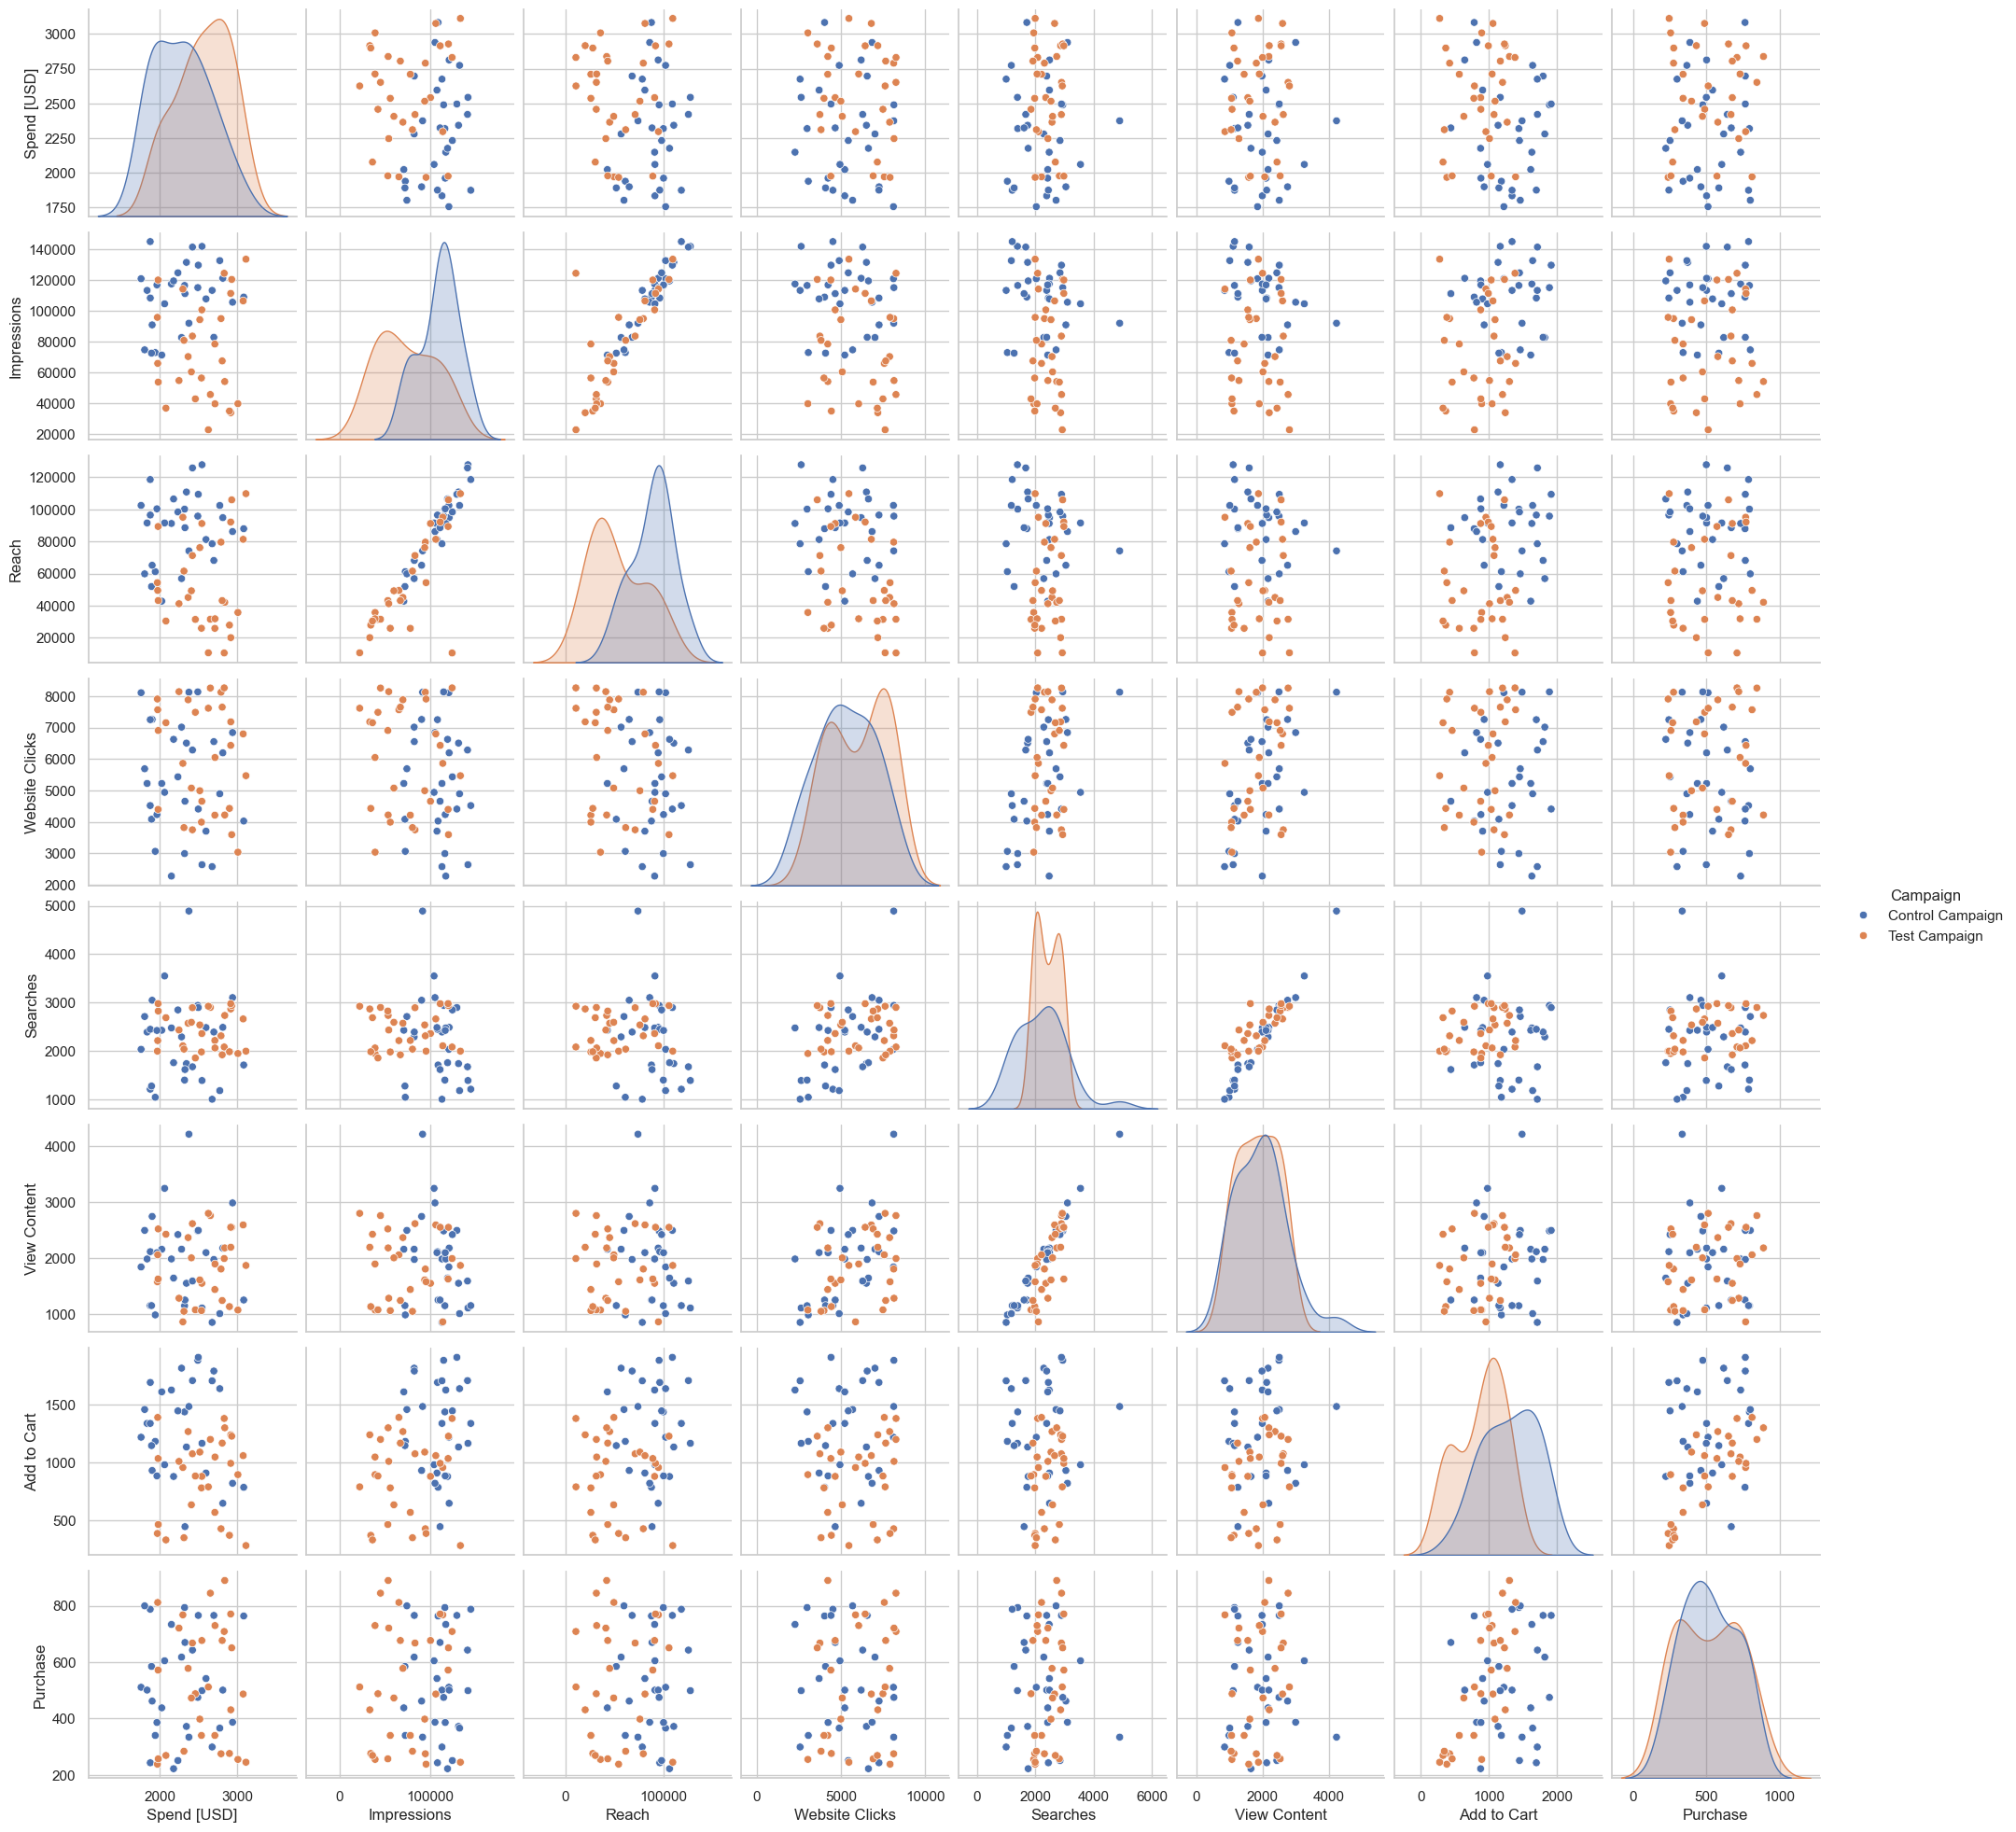

In [181]:
sns.pairplot(data=df,  hue='Campaign')

In [183]:
df["Campaign"].value_counts()

Campaign
Control Campaign    30
Test Campaign       30
Name: count, dtype: int64

<Axes: >

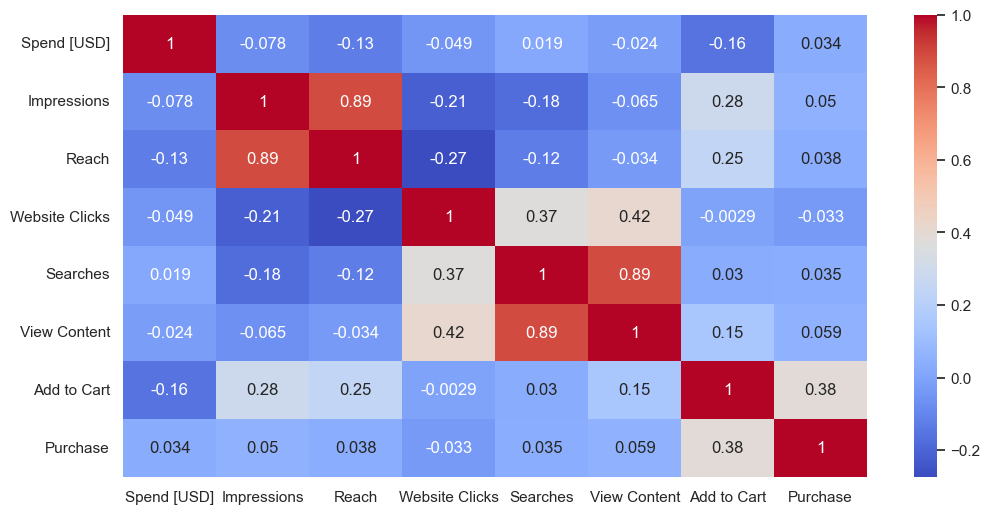

In [357]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

In [377]:
def plot_numeric(func):
    fig, axes = plt.subplots(2, 4, figsize=(15, 10), dpi=150)
    axes = axes.flatten()

    numeric_cols = df.select_dtypes(include=['int', 'float']).columns.to_list()

    for i, col in enumerate(numeric_cols):
        func(data=df, x="Campaign", y=col, ax=axes[i], hue="Campaign")
        axes[i].set_title(col)
        axes[i].set_ylabel("")

    plt.tight_layout()

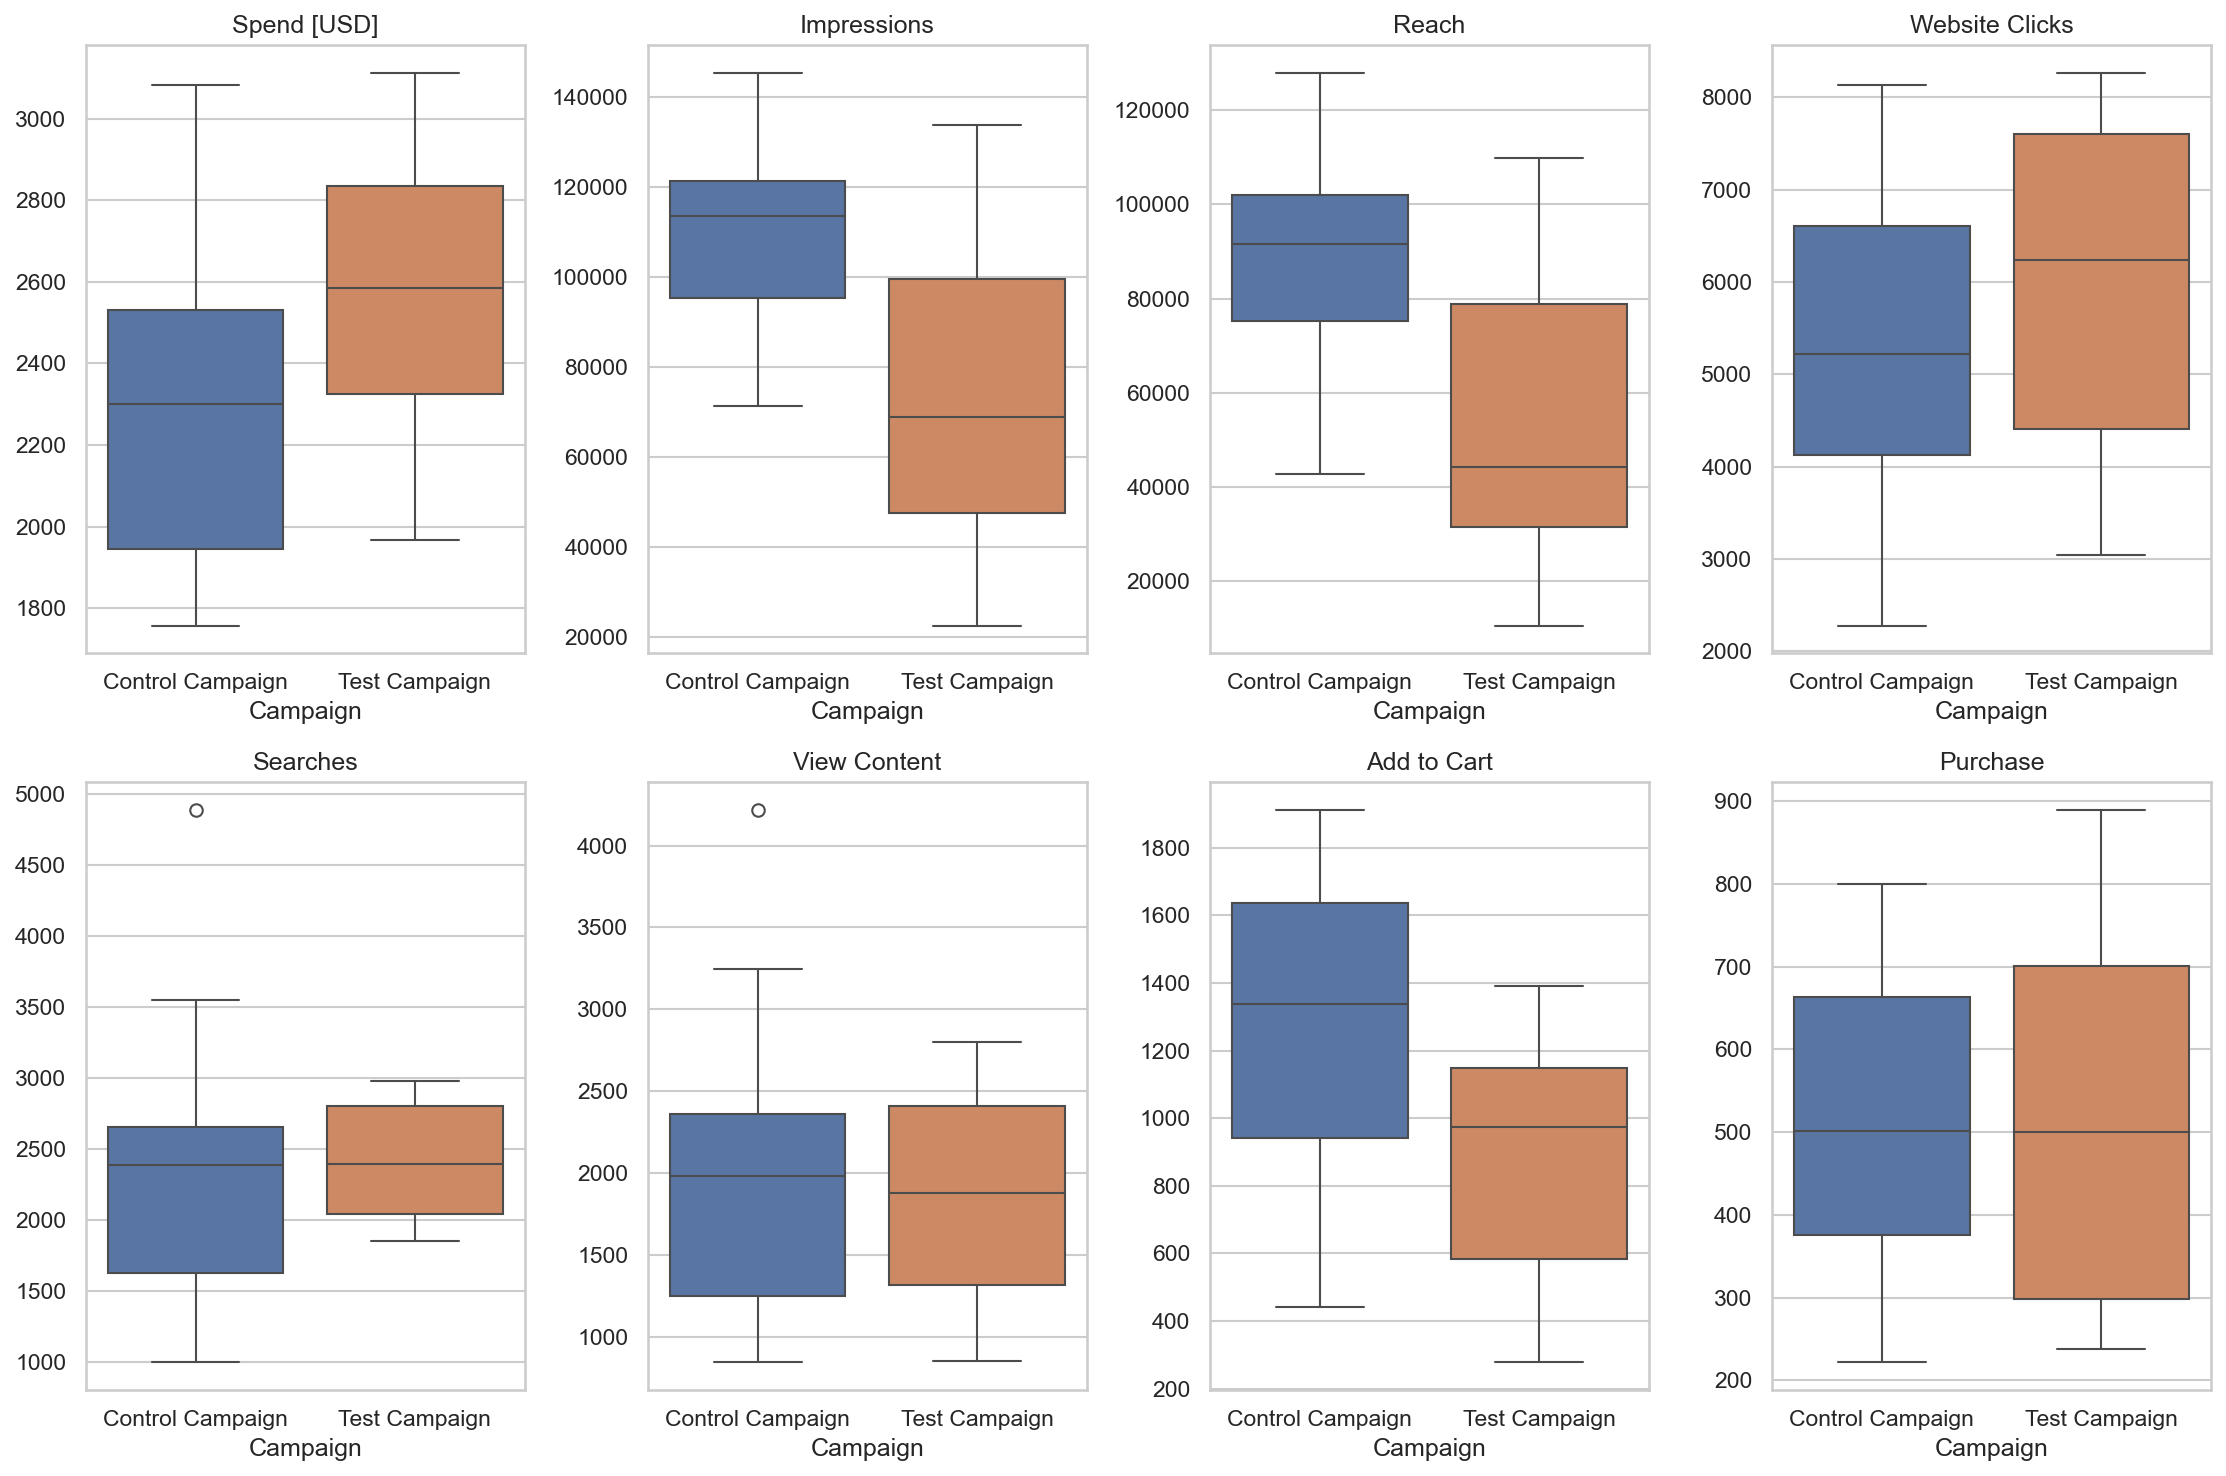

In [379]:
plot_numeric(sns.boxplot)

#  Построение воронки

In [36]:
df.columns

Index(['Campaign', 'Date', 'Spend [USD]', 'Impressions', 'Reach',
       'Website Clicks', 'Searches', 'View Content', 'Add to Cart',
       'Purchase'],
      dtype='object')

In [38]:
stages = ['Impressions', 'Reach','Website Clicks', 'Searches', 'View Content', 'Add to Cart', 'Purchase']
funnels = df.groupby("Campaign")[stages].sum().reset_index()

In [40]:
# Подготовка для визуализации
funnel_melted = funnels.melt(id_vars="Campaign", var_name="Stage", value_name="Count")

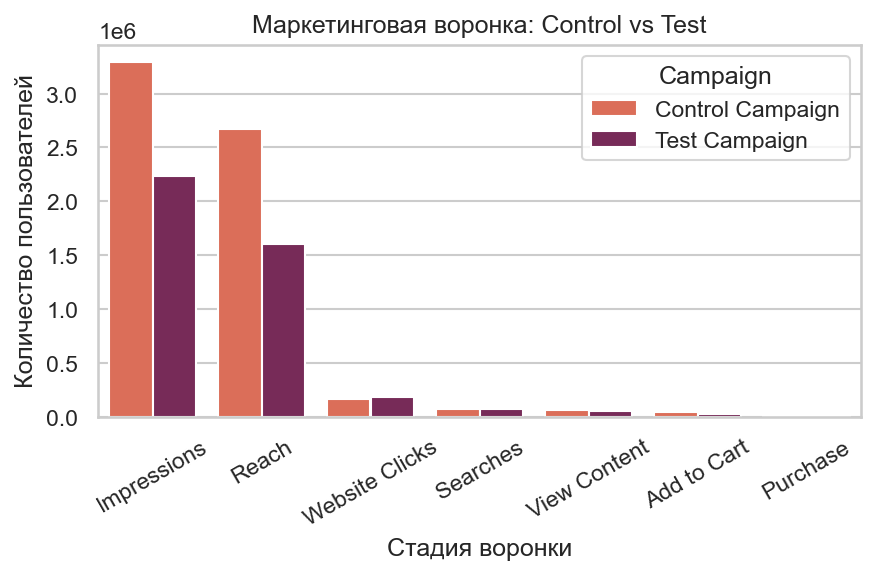

In [42]:
plt.figure(figsize=(6,4), dpi=150)
sns.barplot(data=funnel_melted, x="Stage", y="Count", hue="Campaign", palette="rocket_r")
plt.title("Маркетинговая воронка: Control vs Test")
plt.xticks(rotation=30)
plt.ylabel("Количество пользователей")
plt.xlabel("Стадия воронки")
plt.tight_layout()

# Расчет конверсии

In [44]:
funnels["Click_to_Purchase"] = funnels["Purchase"] / funnels["Website Clicks"]
funnels["Impression_to_Purchase"] = funnels["Purchase"] / funnels["Impressions"]
funnels["View_to_Purchase"] = funnels["Purchase"] / funnels["View Content"]
funnels["AddToCart_to_Purchase"] = funnels["Purchase"] / funnels["Add to Cart"]
funnels["View_to_AddToCart"] = funnels["Add to Cart"] / funnels["View Content"]
funnels["CTR"] = funnels["Website Clicks"] / funnels["Impressions"]
funnels[["Campaign", "Click_to_Purchase", "Impression_to_Purchase","View_to_Purchase", "AddToCart_to_Purchase","View_to_AddToCart", "CTR"]]

,Campaign,Click_to_Purchase,Impression_to_Purchase,View_to_Purchase,AddToCart_to_Purchase,View_to_AddToCart,CTR
0,Control Campaign,0.098178,0.004760,0.268396,0.401189,0.669003,0.048479
1,Test Campaign,0.086407,0.006988,0.280535,0.591280,0.474453,0.080879


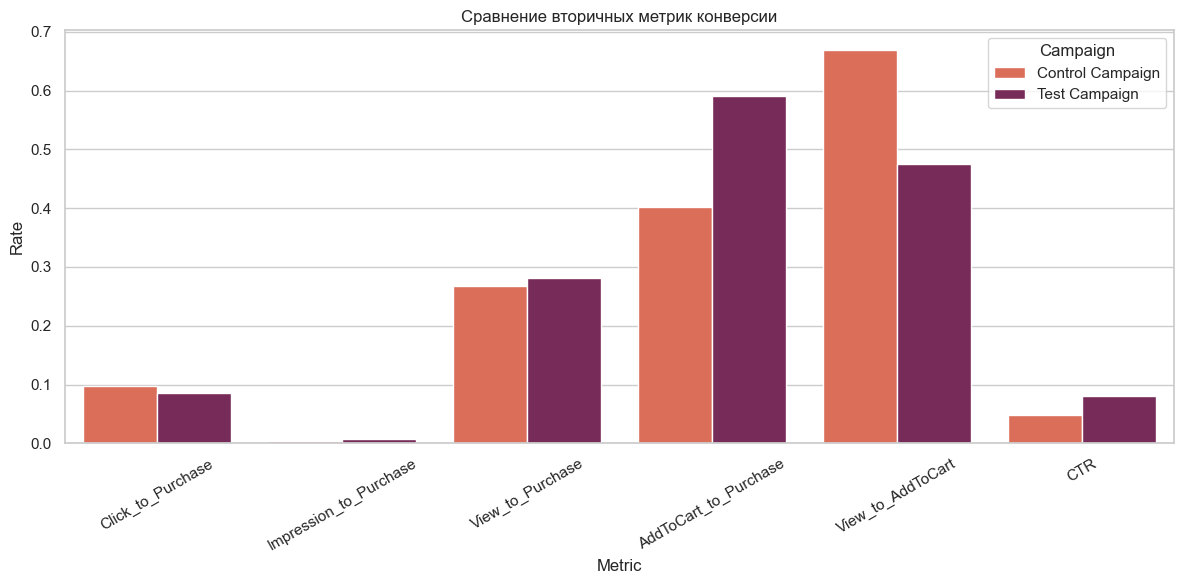

In [46]:
# Визуализация вторичных конверсий
conversion_metrics = ["Click_to_Purchase", "Impression_to_Purchase","View_to_Purchase", "AddToCart_to_Purchase","View_to_AddToCart", "CTR"]
conv_melted = funnels.melt(id_vars="Campaign", value_vars=conversion_metrics, var_name="Metric", value_name="Rate")

plt.figure(figsize=(12, 6))
sns.barplot(data=conv_melted, x="Metric", y="Rate", hue="Campaign", palette="rocket_r")
plt.title("Сравнение вторичных метрик конверсии")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [48]:
# Расчёт дополнительных метрик на уровне строк
for dataset in [control, test]:
    dataset["conversion"] = dataset["Purchase"] / dataset["Website Clicks"]
    dataset["ctr"] = dataset["Website Clicks"] / dataset["Impressions"]
    dataset["view_to_purchase"] = dataset["Purchase"] / dataset["View Content"]
    dataset["addtocart_to_purchase"] = dataset["Purchase"] / dataset["Add to Cart"]
    dataset["view_to_addtocart"] = dataset["Add to Cart"] / dataset["View Content"]
    dataset["impression_to_purchase"] = dataset["Purchase"] / dataset["Impressions"]

# Финальный отчёт

In [68]:
# Функция для t-теста с доверительным интервалом
def run_ttest(metric_name):
    control_metric = control[metric_name].dropna()
    test_metric = test[metric_name].dropna()

    t_stat, p_val = ttest_ind(test_metric, control_metric, equal_var=False)

    mean_diff = test_metric.mean() - control_metric.mean()
    se = np.sqrt(test_metric.var()/len(test_metric) + control_metric.var()/len(control_metric))

    df_denom = (test_metric.var()/len(test_metric) + control_metric.var()/len(control_metric))**2
    df_num = (test_metric.var()/len(test_metric))**2 / (len(test_metric)-1) + (control_metric.var()/len(control_metric))**2 / (len(control_metric)-1)
    df_eff = df_denom / df_num

    t_crit = t.ppf(1 - 0.025, df_eff)
    ci_low = mean_diff - t_crit * se
    ci_high = mean_diff + t_crit * se

    # Визуализация распределений
    plt.figure(figsize=(10,5))
    sns.kdeplot(control_metric, label="Control")
    sns.kdeplot(test_metric, label="Test")
    plt.title(f"Распределение метрики: {metric_name}")
    plt.xlabel(metric_name)
    plt.legend()
    plt.tight_layout()

    print(f"""Отчёт A/B теста по метрике: {metric_name}
    
      Control: Среднее значение {control_metric.mean():.4f},  Ст. отклонение {control_metric.std():.4f},  Кол-во {len(control_metric)}
      
      Test: Среднее значение {test_metric.mean():.4f}, Ст. отклонение {test_metric.std():.4f}, Кол-во {len(test_metric)} 
            
      Статистический тест:
            - t-статистика = {t_stat:.4f}
            - p-value = {p_val:.4f}
            - 95% доверительный интервал разницы: [{ci_low:.4f}, {ci_high:.4f}]""")



In [101]:
test.columns

Index(['Campaign', 'Date', 'Spend [USD]', 'Impressions', 'Reach',
       'Website Clicks', 'Searches', 'View Content', 'Add to Cart', 'Purchase',
       'conversion', 'ctr', 'view_to_purchase', 'addtocart_to_purchase',
       'view_to_addtocart', 'impression_to_purchase'],
      dtype='object')

In [105]:
# Запуск t-тестов по всем метрикам
metrics = [
    "conversion", "ctr", "view_to_purchase",
    "addtocart_to_purchase", "view_to_addtocart",
    "impression_to_purchase"
]

Отчёт A/B теста по метрике: conversion
    
      Control: Среднее значение 0.1141,  Ст. отклонение 0.0673,  Кол-во 30
      
      Test: Среднее значение 0.0923, Ст. отклонение 0.0445, Кол-во 30 
            
      Статистический тест:
            - t-статистика = -1.4824
            - p-value = 0.1445
            - 95% доверительный интервал разницы: [-0.0514, 0.0077]


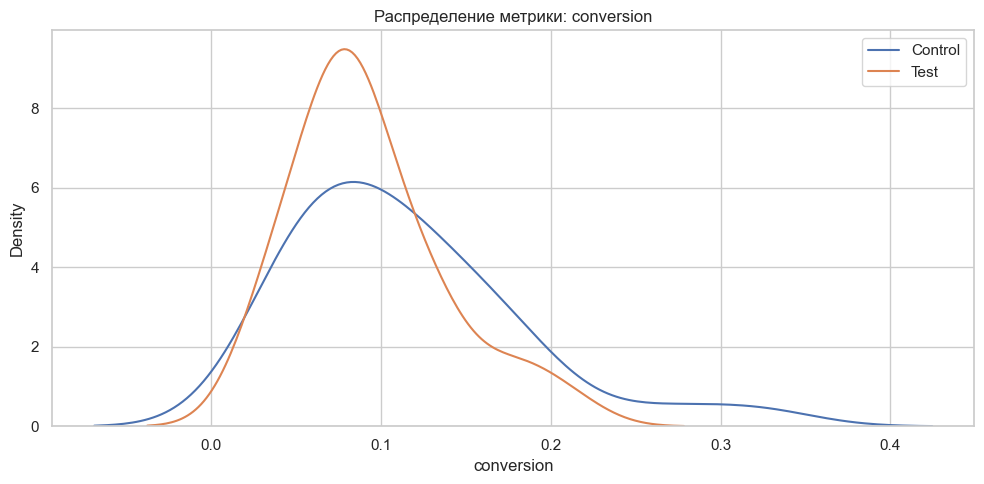

In [107]:
run_ttest('conversion')

Отчёт A/B теста по метрике: conversion
    
      Control: Среднее значение 0.1141,  Ст. отклонение 0.0673,  Кол-во 30
      
      Test: Среднее значение 0.0923, Ст. отклонение 0.0445, Кол-во 30 
            
      Статистический тест:
            - t-статистика = -1.4824
            - p-value = 0.1445
            - 95% доверительный интервал разницы: [-0.0514, 0.0077]

Отчёт A/B теста по метрике: ctr
    
      Control: Среднее значение 0.0508,  Ст. отклонение 0.0202,  Кол-во 30
      
      Test: Среднее значение 0.1024, Ст. отклонение 0.0677, Кол-во 30 
            
      Статистический тест:
            - t-статистика = 4.0025
            - p-value = 0.0003
            - 95% доверительный интервал разницы: [0.0254, 0.0778]

Отчёт A/B теста по метрике: view_to_purchase
    
      Control: Среднее значение 0.3126,  Ст. отклонение 0.1668,  Кол-во 30
      
      Test: Среднее значение 0.3055, Ст. отклонение 0.1630, Кол-во 30 
            
      Статистический тест:
            - t-ст

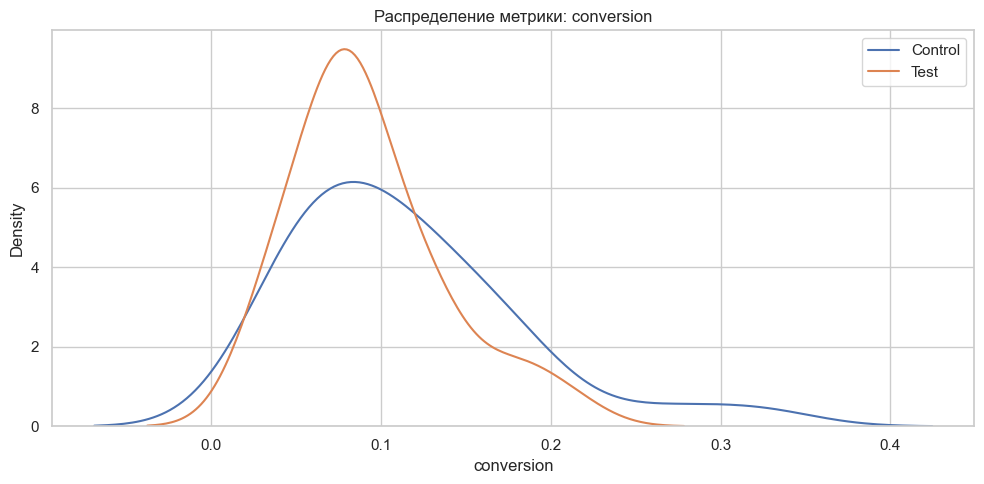

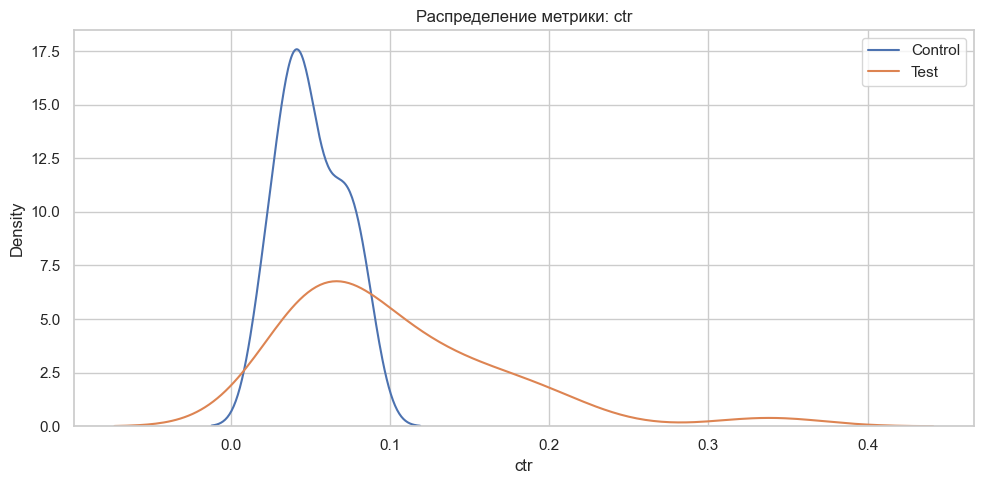

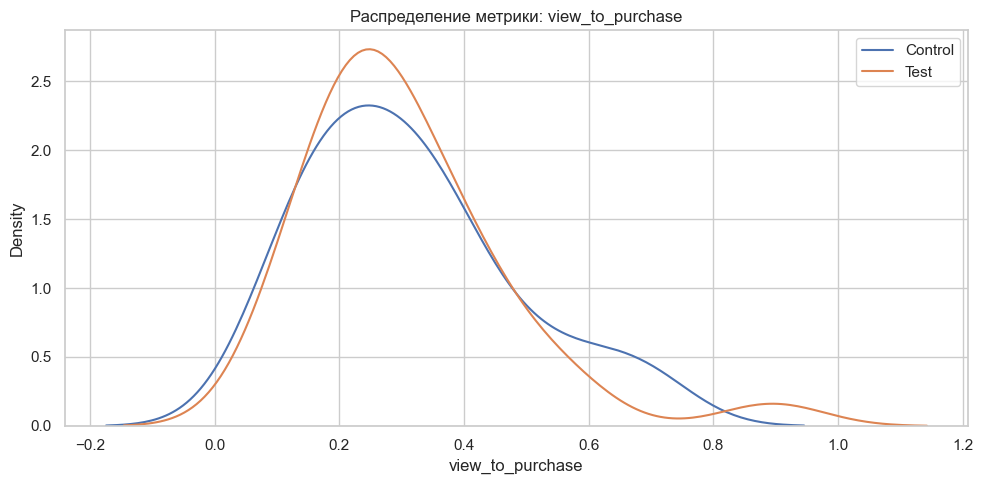

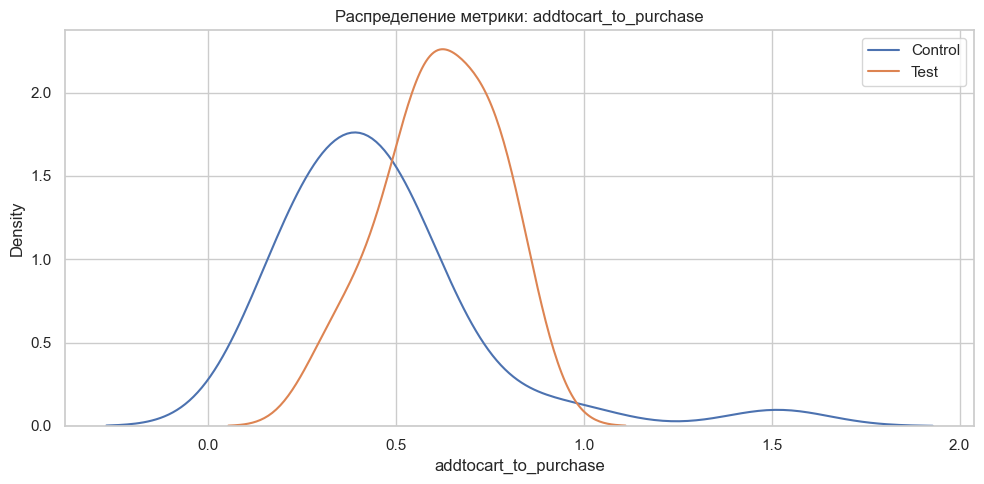

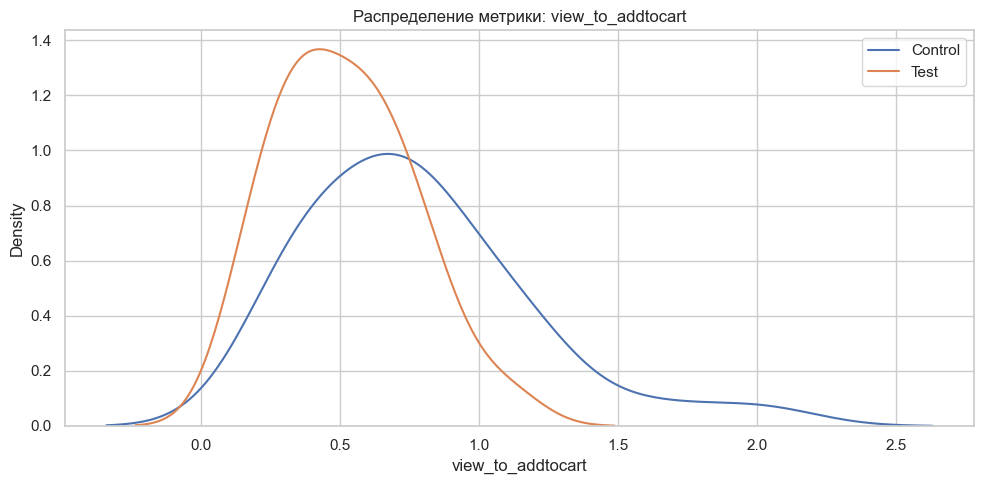

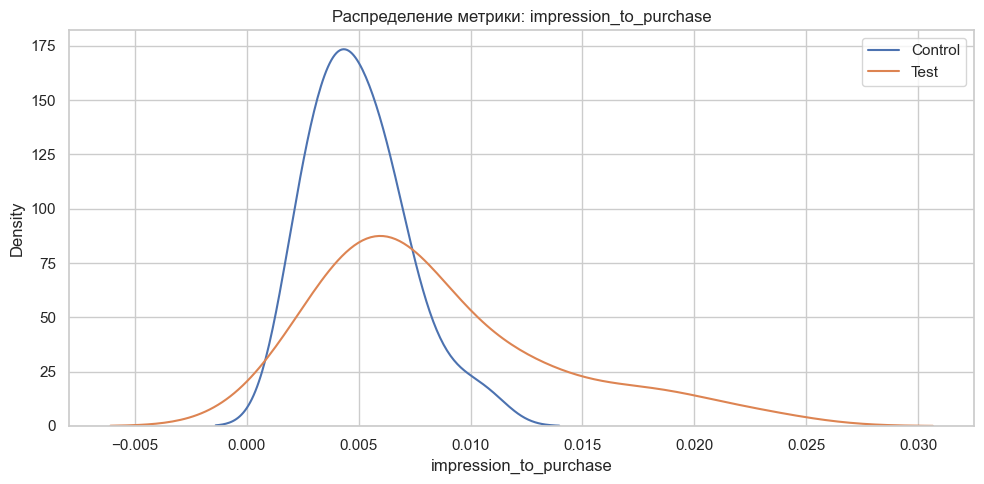

In [72]:
for i in metrics:
    run_ttest(i)
    print()

#  Финальные выводы по A/B тесту

**Значимые различия (p < 0.05):**
- **CTR** значительно выше в Test → объявления лучше привлекают клики.
- **Add to Cart → Purchase**: пользователи в Test чаще завершают покупку.
- **Impression → Purchase**: новая кампания приводит к большему количеству покупок с тех же показов.
- **View → Add to Cart**: неожиданно, в Test меньше добавлений в корзину после просмотра — стоит проверить UX.

 **Незначимые различия:**
- **Conversion (Clicks → Purchase)** — нет значимого улучшения (p > 0.1).
- **View → Purchase** — одинаковая эффективность в обеих группах.

**Рекомендации:**
1. Продолжать масштабирование кампании с мониторингом.
2. Углублённый анализ пользовательского поведения после просмотра карточек.
3. Возможная доработка карточек товара и стимулов к добавлению в корзину.